In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [681]:
N=1000
n=50

In [682]:
filename = "./SimulationResults/KLTables/N%dn%d.csv" %(N,n)
filename

'./SimulationResults/KLTables/N1000n50.csv'

In [683]:
df = pd.read_csv(filename)
df = df.iloc[:,1:]
df.head()

,N,n,run,alpha0,sd_data,sigma,KL
0,1000,50,10,0.5,14.116545,0.00,464.958530
1,1000,50,10,0.5,14.116545,0.75,399.721375
2,1000,50,10,0.5,14.116545,1.50,306.365478
3,1000,50,10,0.5,14.116545,2.25,231.254791
4,1000,50,10,0.5,14.116545,3.00,167.530414


In [684]:
df.sort_values(by='sd_data',ascending=False).head()

,N,n,run,alpha0,sd_data,sigma,KL
6432,1000,50,10,0.5,14.223686,0.00,520.764238
6474,1000,50,10,0.5,14.223686,31.50,28.649534
6480,1000,50,10,0.5,14.223686,36.00,29.942679
6479,1000,50,10,0.5,14.223686,35.25,29.862281
6478,1000,50,10,0.5,14.223686,34.50,29.628010


In [685]:
df['sd_data'] = np.round(df.sd_data,5)
df['sigma'] = np.round(df.sigma,3)
df['KL'] = np.round(df.KL,5)
df.head()

,N,n,run,alpha0,sd_data,sigma,KL
0,1000,50,10,0.5,14.11655,0.00,464.95853
1,1000,50,10,0.5,14.11655,0.75,399.72138
2,1000,50,10,0.5,14.11655,1.50,306.36548
3,1000,50,10,0.5,14.11655,2.25,231.25479
4,1000,50,10,0.5,14.11655,3.00,167.53041


In [686]:
minKLs = np.array(df.groupby('sd_data')['KL'].min())
sds = np.array(pd.DataFrame(df.groupby('sd_data')['sd_data'].unique()).index)

In [687]:
print(len(sds))
print(len(minKLs))
df.head()

160
160


,N,n,run,alpha0,sd_data,sigma,KL
0,1000,50,10,0.5,14.11655,0.00,464.95853
1,1000,50,10,0.5,14.11655,0.75,399.72138
2,1000,50,10,0.5,14.11655,1.50,306.36548
3,1000,50,10,0.5,14.11655,2.25,231.25479
4,1000,50,10,0.5,14.11655,3.00,167.53041


In [688]:
sd = sds[0]
KL = minKLs[0]
tmp = df[df['sd_data']==sd]
minSigma = np.array(tmp['sigma'][tmp['KL'] == KL])
sd_data = np.array([sd]*len(minSigma))
minSigmaDF = pd.DataFrame({"optim_sigma":minSigma}, index = sd_data)
minSigmaDF.head()

,optim_sigma
6.70016,40.5


In [689]:
np.array(tmp['sigma'][tmp['KL'] == KL])

array([40.5])

In [690]:
for sd, KL in zip(sds[1:],minKLs[1:]):
    tmp = df[df['sd_data']==sd]
    minSigma = np.array(tmp['sigma'][tmp['KL'] == KL])
    sd_data = np.array([sd]*len(minSigma))
    tmpDf = pd.DataFrame({"optim_sigma":minSigma}, index = sd_data)
    minSigmaDF = pd.concat([minSigmaDF,tmpDf])

In [691]:
minSigmaDF['sd_data'] = np.array(minSigmaDF.index)
minSigmaDF.sort_index(axis=1)
minSigmaDF.head()

,optim_sigma,sd_data
6.70016,40.50,6.70016
6.72320,48.75,6.72320
6.73319,42.75,6.73319
6.81304,45.00,6.81304
6.82458,47.25,6.82458


In [692]:
figure_file = "./figures/N%dn%d.pdf" %(N,n)
figure_file

'./figures/N1000n50.pdf'

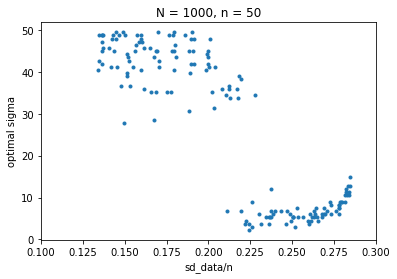

In [693]:
plt.plot(minSigmaDF.sd_data/n,minSigmaDF.optim_sigma, "o",ms=3)
plt.xlim(0.1,0.3)
plt.xlabel("sd_data/n")
plt.ylabel("optimal sigma")
plt.title("N = %d, n = %d" %(N, n))
plt.savefig(figure_file)